In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### 1. Import and understand the data. 

#### a) Import signal data

In [2]:
df = pd.read_csv('signal-data.csv')
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [3]:
df.info()
df=df.drop(['Time'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


#### b) Print 5 point summary and share at least 2 observations.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


#### it seems there are 591 columns in this data
#### it has Pass/fail as target column with values as -1 ,1 and values between -1 and 1
#### Few values are NaN which means there are some Null values in data set
#### we can see for few columns min value is small and max is very large which means there are lot of outliers in data

### 2. Data cleansing:

#### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in df.columns:
    column_null_percentage = df[i].isnull().sum() * 100 / len(df)
    if(column_null_percentage>20):
        print("dropping column: ",i, " with null percentage = ",column_null_percentage)
        df.drop([i],axis=1,inplace=True)
    elif column_null_percentage > 0:
        print("imputing column: ",i," with mean")
        df[i] = imputer.fit_transform(df[[i]])

imputing column:  0  with mean
imputing column:  1  with mean
imputing column:  2  with mean
imputing column:  3  with mean
imputing column:  4  with mean
imputing column:  5  with mean
imputing column:  6  with mean
imputing column:  7  with mean
imputing column:  8  with mean
imputing column:  9  with mean
imputing column:  10  with mean
imputing column:  11  with mean
imputing column:  12  with mean
imputing column:  13  with mean
imputing column:  14  with mean
imputing column:  15  with mean
imputing column:  16  with mean
imputing column:  17  with mean
imputing column:  18  with mean
imputing column:  19  with mean
imputing column:  21  with mean
imputing column:  22  with mean
imputing column:  23  with mean
imputing column:  24  with mean
imputing column:  25  with mean
imputing column:  26  with mean
imputing column:  27  with mean
imputing column:  28  with mean
imputing column:  29  with mean
imputing column:  30  with mean
imputing column:  31  with mean
imputing column:  

imputing column:  261  with mean
imputing column:  262  with mean
imputing column:  263  with mean
imputing column:  264  with mean
imputing column:  265  with mean
imputing column:  266  with mean
imputing column:  267  with mean
imputing column:  268  with mean
imputing column:  269  with mean
imputing column:  270  with mean
imputing column:  271  with mean
imputing column:  272  with mean
imputing column:  273  with mean
imputing column:  274  with mean
imputing column:  275  with mean
imputing column:  276  with mean
imputing column:  277  with mean
imputing column:  278  with mean
imputing column:  279  with mean
imputing column:  280  with mean
imputing column:  281  with mean
imputing column:  282  with mean
imputing column:  283  with mean
imputing column:  284  with mean
imputing column:  285  with mean
imputing column:  286  with mean
imputing column:  287  with mean
imputing column:  288  with mean
imputing column:  289  with mean
imputing column:  290  with mean
dropping c

imputing column:  540  with mean
imputing column:  541  with mean
imputing column:  542  with mean
imputing column:  543  with mean
imputing column:  544  with mean
imputing column:  545  with mean
imputing column:  546  with mean
imputing column:  547  with mean
imputing column:  548  with mean
imputing column:  549  with mean
imputing column:  550  with mean
imputing column:  551  with mean
imputing column:  552  with mean
imputing column:  553  with mean
imputing column:  554  with mean
imputing column:  555  with mean
imputing column:  556  with mean
imputing column:  557  with mean
imputing column:  558  with mean
imputing column:  559  with mean
imputing column:  560  with mean
imputing column:  561  with mean
imputing column:  562  with mean
imputing column:  563  with mean
imputing column:  564  with mean
imputing column:  565  with mean
imputing column:  566  with mean
imputing column:  567  with mean
imputing column:  568  with mean
imputing column:  569  with mean
dropping c

In [6]:
df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 559, dtype: int64

In [7]:
for col in df:
        if df[col].isnull().sum() > 0:
            mean_value=df[col].mean()
            df[col].fillna(value=mean_value, inplace=True)

In [8]:
df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 559, dtype: int64

#### B. Identify and drop the features which are having same value for all the rows.

In [9]:
for i in df.columns:
        if df[i].nunique()==1:
            print("Dropping feature ",i," with same values across all rows")

Dropping feature  5  with same values across all rows
Dropping feature  13  with same values across all rows
Dropping feature  42  with same values across all rows
Dropping feature  49  with same values across all rows
Dropping feature  52  with same values across all rows
Dropping feature  69  with same values across all rows
Dropping feature  97  with same values across all rows
Dropping feature  141  with same values across all rows
Dropping feature  149  with same values across all rows
Dropping feature  178  with same values across all rows
Dropping feature  179  with same values across all rows
Dropping feature  186  with same values across all rows
Dropping feature  189  with same values across all rows
Dropping feature  190  with same values across all rows
Dropping feature  191  with same values across all rows
Dropping feature  192  with same values across all rows
Dropping feature  193  with same values across all rows
Dropping feature  194  with same values across all rows


In [10]:
df.shape

(1567, 559)

#### C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [11]:
#dropping the columns the have constant signal
cols = df.select_dtypes([np.number]).columns
std = df[cols].std()
cols_to_drop = std[std==0].index
df.drop(cols_to_drop, axis=1,inplace=True)
df.head()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [12]:
#dropping columns with variance threshold less than 0.003
for i in df.columns:
    column_variance = df[i].var()
    if(column_variance<=0.003):
        print("Dropping column with variance :",column_variance)
        df.drop([i],axis=1,inplace=True)

df.shape

Dropping column with variance : 7.984369711717394e-05
Dropping column with variance : 0.00022820736038583472
Dropping column with variance : 8.641864894176945e-05
Dropping column with variance : 0.00015485556858808785
Dropping column with variance : 0.00014522306021417356
Dropping column with variance : 0.00028012491013976854
Dropping column with variance : 0.0010839172976713637
Dropping column with variance : 4.6221805105124906e-05
Dropping column with variance : 1.739403363541804e-05
Dropping column with variance : 0.0004893247609730103
Dropping column with variance : 0.0010855618582085768
Dropping column with variance : 0.0009688861071009109
Dropping column with variance : 0.002256634541848035
Dropping column with variance : 0.0005245066095057901
Dropping column with variance : 0.0023860637469675264
Dropping column with variance : 0.0002852785442599504
Dropping column with variance : 0.0012814116478654875
Dropping column with variance : 2.532012305708525e-05
Dropping column with var

(1567, 327)

#### Q2 D - Check for multi-collinearity in the data and take necessary action.

In [13]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 156 entries, 0 to Pass/Fail
dtypes: float64(155), int64(1)
memory usage: 1.9 MB


In [15]:
df.dtypes
#dropping duplicates
df.drop_duplicates()

,0,1,2,3,4,6,8,12,14,15,...,562,563,564,565,570,571,572,585,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,1.500500,202.439600,7.955800,414.871000,...,262.729683,0.679641,6.444985,0.14561,533.8500,2.1113,8.95,2.3630,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,1.496600,200.547000,10.154800,414.734700,...,262.729683,0.679641,6.444985,0.14561,535.0164,2.4335,5.92,4.4447,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,1.443600,202.017900,9.515700,416.707500,...,267.064000,0.903200,1.100000,0.62190,535.0245,2.0293,11.21,3.1745,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,1.488200,201.848200,9.605200,422.289400,...,268.228000,0.651100,7.320000,0.16300,530.5682,2.0253,9.33,2.0544,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1.503100,201.942400,10.566100,420.592500,...,262.729683,0.679641,6.444985,0.14561,532.0155,2.0275,8.83,99.3032,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,1.342400,203.986700,11.769200,419.340400,...,264.272000,0.567100,4.980000,0.08770,536.3418,2.0153,7.98,2.8669,203.172000,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,1.433300,204.017300,9.162000,405.817800,...,266.832000,0.625400,4.560000,0.13080,537.9264,2.1814,5.48,2.6238,203.172000,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,1.462862,199.956809,9.005371,413.086035,...,256.730000,0.820900,11.090000,0.23880,530.3709,2.3435,6.49,3.0590,43.523100,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,1.462200,197.244800,9.735400,401.915300,...,264.272000,0.567100,4.980000,0.08770,534.3936,1.9098,9.13,3.5662,93.494100,-1


#### Q2 E - Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [16]:
#checking for distribution of the target class shows that the data set is highly imbalanced
df['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

In [17]:
#label encoding the target class
df['Pass/Fail']=df['Pass/Fail'].replace([-1,1],[0,1])

In [18]:
# checking how many rows have missing values shows that all rows have atleast one missing value
rows=df.isnull().any(axis = 1).sum()
print( 'All the' ,rows,'rows have atleast one missing value')

All the 0 rows have atleast one missing value


#### Q3 A - Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

<AxesSubplot:xlabel='3', ylabel='Count'>

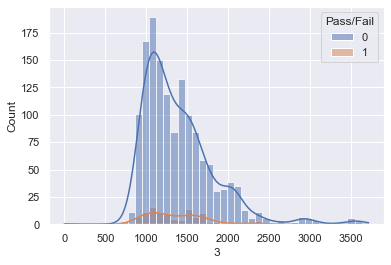

In [19]:
sns.histplot(data=df, x=df['3'],hue=df['Pass/Fail'], kde=True)

<AxesSubplot:xlabel='4', ylabel='Count'>

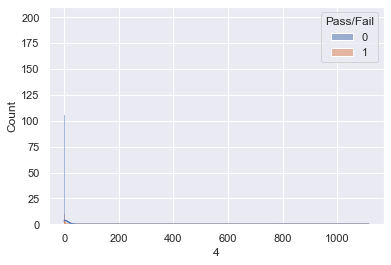

In [20]:
sns.histplot(data=df, x=df['4'],hue=df['Pass/Fail'], kde=True)

<AxesSubplot:xlabel='6', ylabel='Count'>

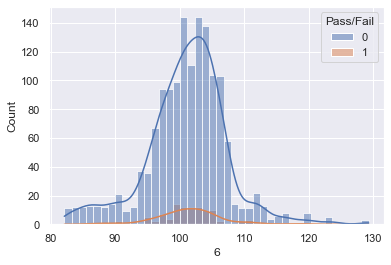

In [21]:

sns.histplot(data=df, x=df['6'],hue=df['Pass/Fail'], kde=True)

<AxesSubplot:xlabel='15', ylabel='Count'>

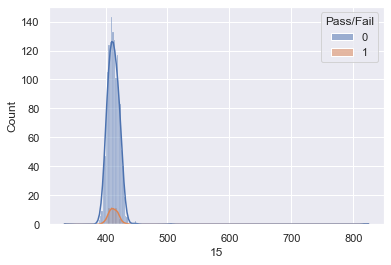

In [22]:
sns.histplot(data=df, x=df['15'],hue=df['Pass/Fail'], kde=True)

<AxesSubplot:xlabel='589', ylabel='Count'>

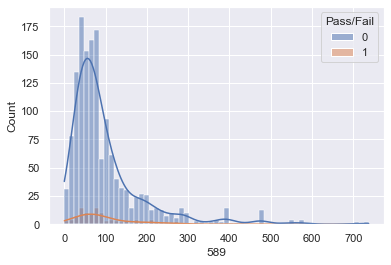

In [23]:
sns.histplot(data=df, x=df['589'],hue=df['Pass/Fail'], kde=True)

#### Multiple features have different kind of distribution
#### Some of them are right skewed. Some of them are normally distributed. Some of them are left skewed
#### Some of them have multiple modes
#### The number of failures (-1) are more than pass in all of the visualization

#### B. Perform bivariate and multivariate analysis, provide comments¶

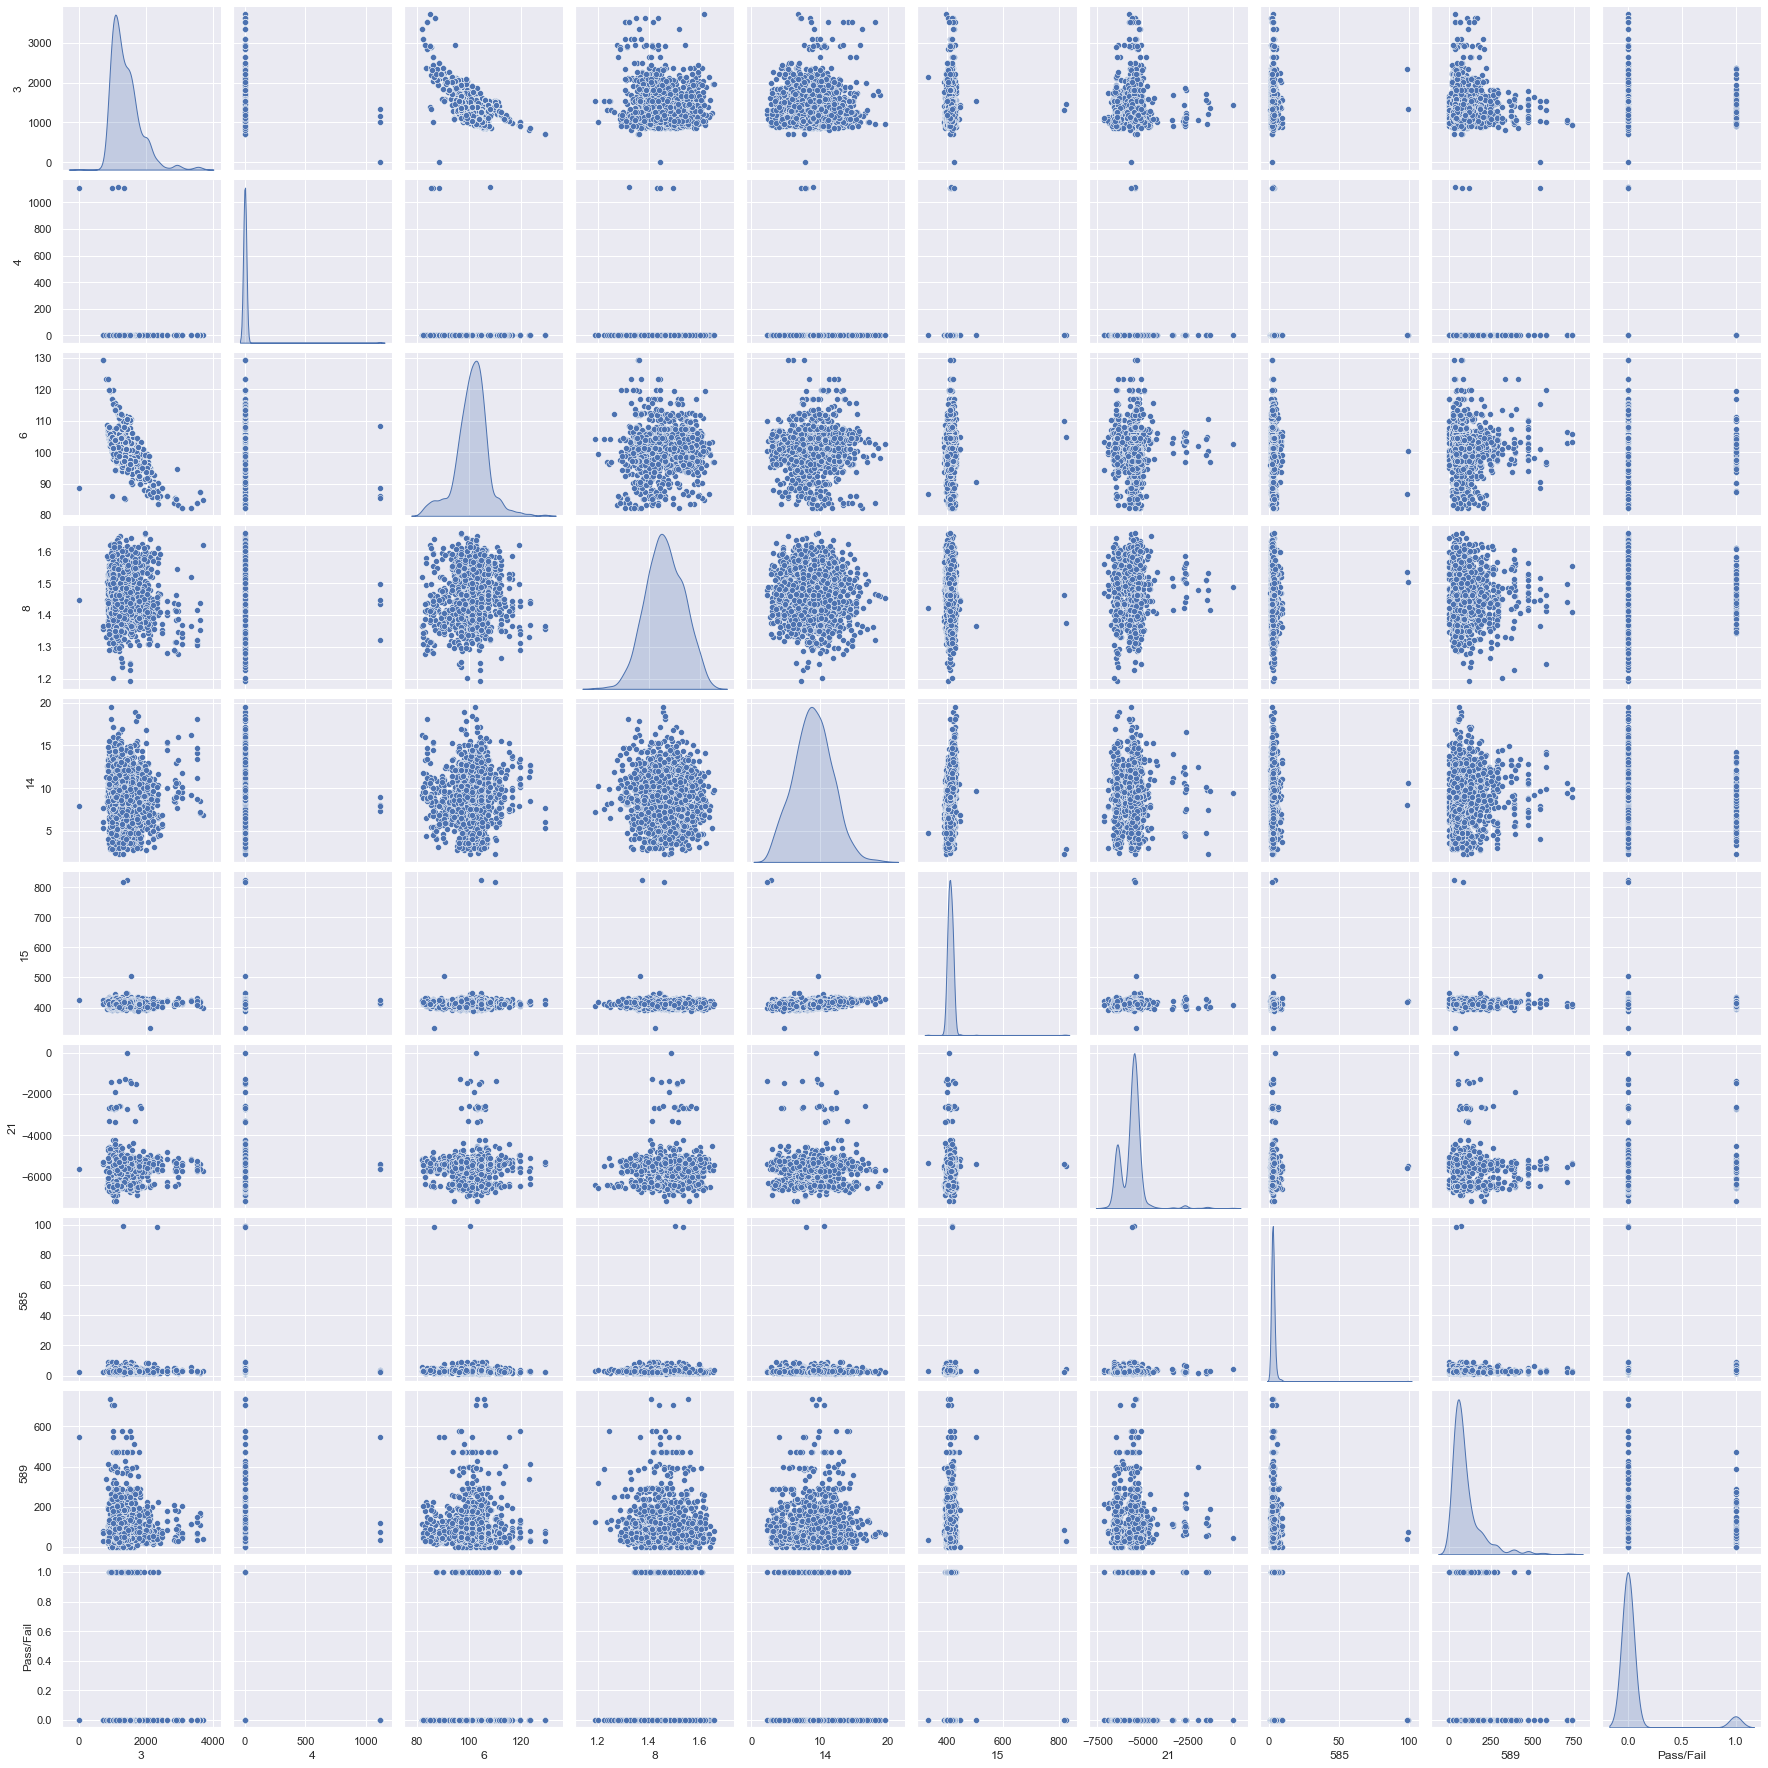

In [24]:
#As there are many features, plotting for few features randomly
sns.pairplot(df,vars=['3','4','6','8','14','15','21','585','589','Pass/Fail'],diag_kind='kde')

#### Comments

#### Most of them are not correlated with each other, except for few (Eg: 3 and 6)
#### The Pass/Fail data is imbalanced

#### Q4 A - Segregate predictors vs target attributes.

In [25]:
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['Pass/Fail'])
object= StandardScaler()
X_scaler = object.fit_transform(X)

y=df['Pass/Fail']

<AxesSubplot:xlabel='index', ylabel='Pass/Fail'>

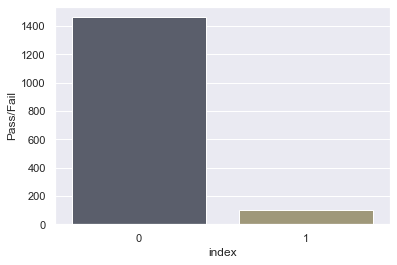

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler,y, stratify = y, test_size=0.3,random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
pass_fail = df['Pass/Fail'].value_counts().reset_index()
sns.barplot(x="index",y="Pass/Fail",data=pass_fail,palette='cividis')

In [27]:
print("Training Fail    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Training Fail    : 73 (6.66%)
Training Pass  : 1023 (93.34%)

Test Fail        : 31 (6.58%)
Test Pass       : 440 (93.42%)



#### Q4 B - Check for target balancing and fix it if found imbalanced.

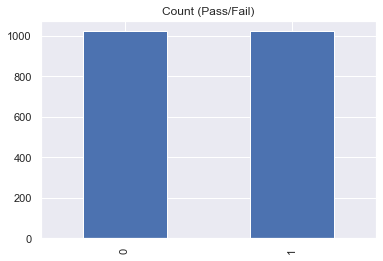

In [28]:
# Implementing SMOTE
smt = SMOTE()
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)
y_SMOTE.value_counts().plot(kind='bar', title='Count (Pass/Fail)');

In [29]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))

SMOTE Training Fail    : 1023 (50.00%)
SMOTE Training Pass  : 1023 (50.00%)


#### using smote analysis I balanced the Training data for Pass/Fail as 50% and fix the imbalanced problem

#### Q4C. Perform train-test split and standardise the data or vice versa if required.

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,  test_size=0.2,random_state = 1)


#### Q4D .Check if the train and test data have similar statistical characteristics when compared with original data.

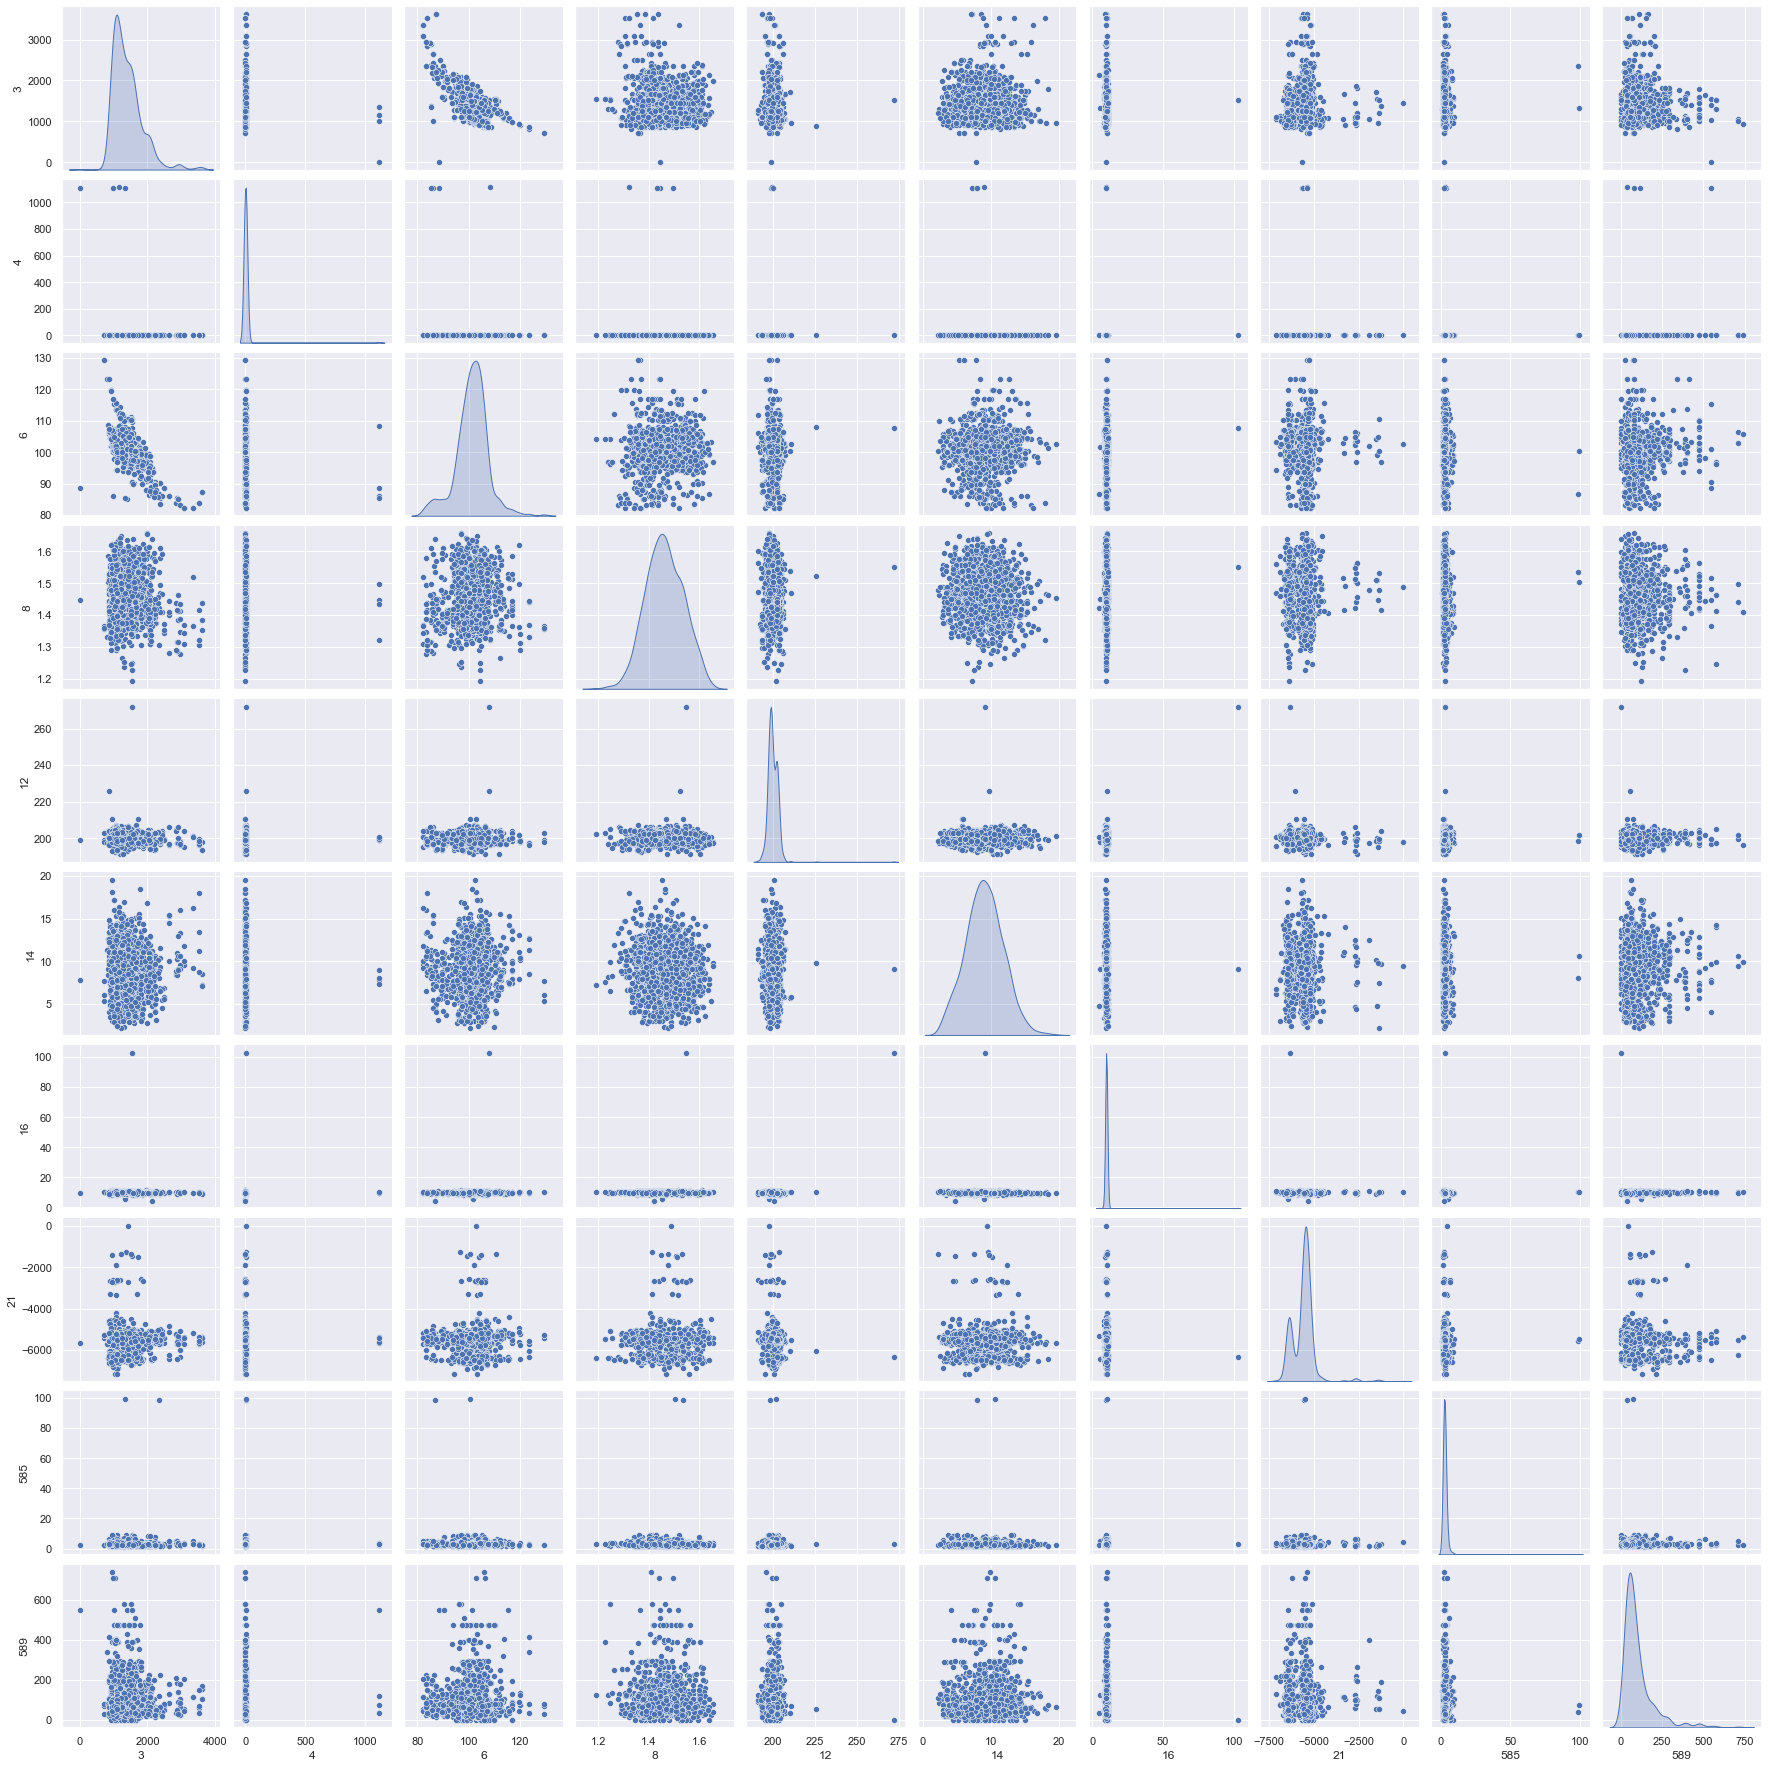

In [31]:
#As there are many features, plotting for few features randomly
sns.pairplot(X_train,vars=['3','4','6','8','12','14','16','21','585','589'],diag_kind='kde')

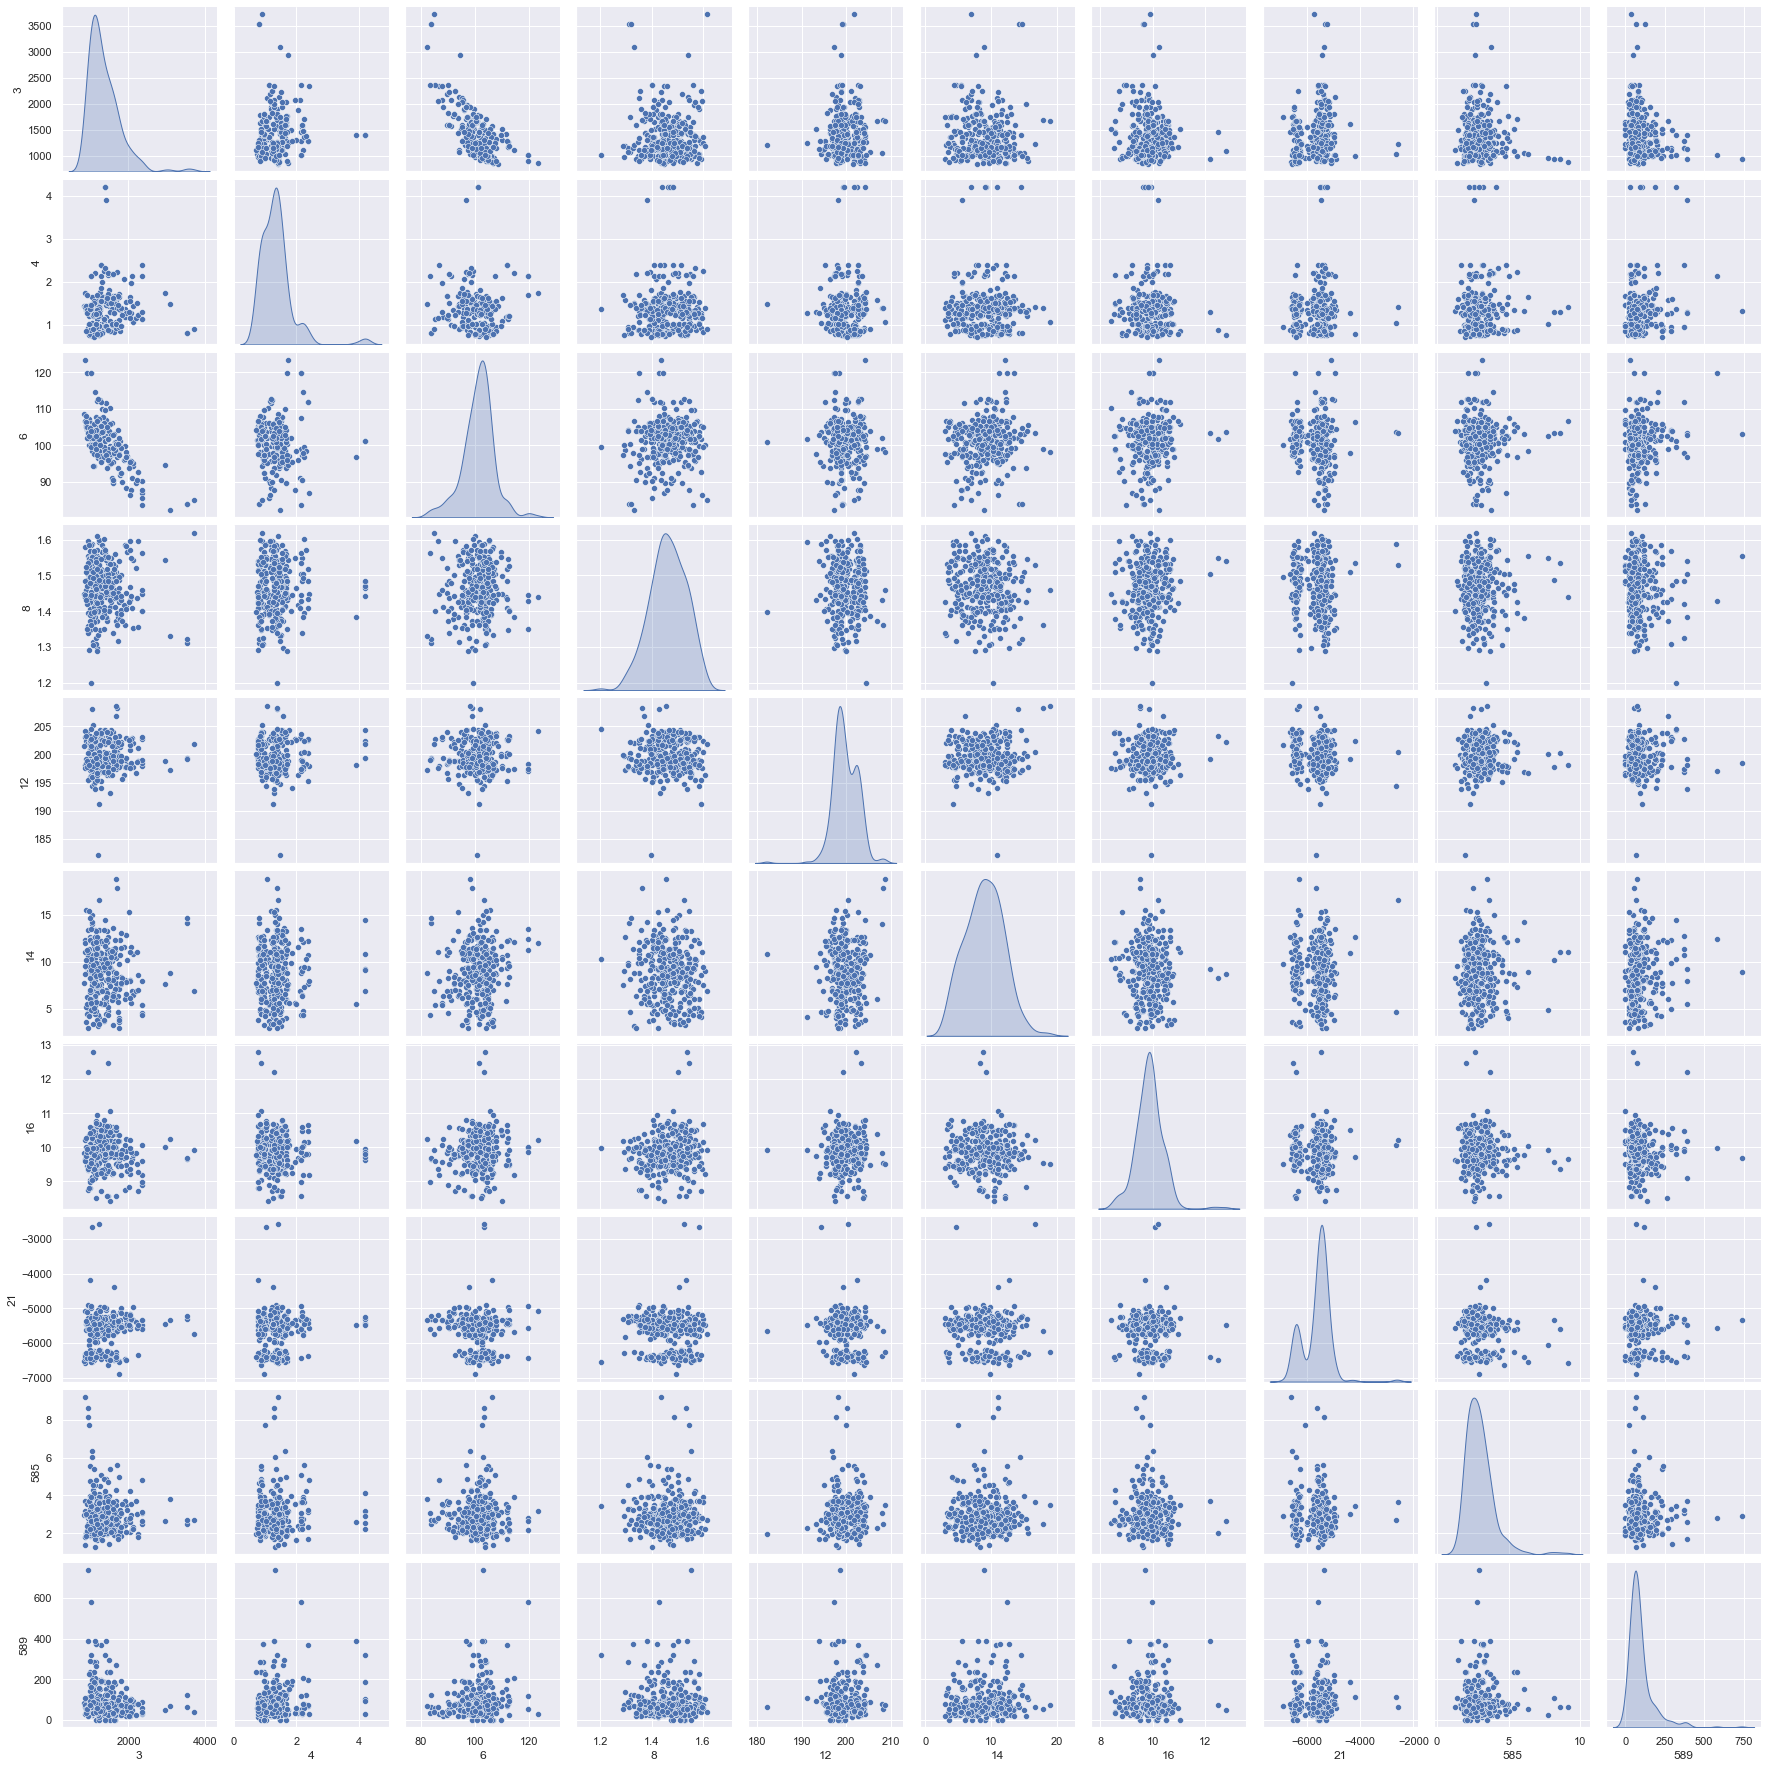

In [32]:
#As there are many features, plotting for few features randomly
sns.pairplot(X_test,vars=['3','4','6','8','12','14','16','21','585','589'],diag_kind='kde')

#### Comparison
#### From the pair plot, the train data looks same as original data. However the test data looks different.
#### Eg: The plot of feature 3 vs feature 4 in test data looks different when compared to original data.



In [33]:
### Mean of original training data 
X_train.describe()

,0,1,2,3,4,6,8,12,14,15,...,559,562,563,564,565,570,571,572,585,589
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,...,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,3013.866452,2496.629929,2201.290846,1403.256325,4.908578,101.095448,1.462622,200.003248,9.024268,413.262184,...,0.327679,262.625963,0.682828,6.417882,0.146424,530.713290,2.103015,28.713032,3.089862,101.035899
std,71.637227,79.603283,29.751316,443.015123,62.724442,6.294853,0.074609,3.364851,2.764545,18.733734,...,0.202893,6.862589,0.112831,2.362064,0.072612,16.501433,0.276811,87.077562,3.966532,96.113503
min,2770.400000,2158.750000,2060.660000,0.000000,0.681500,82.131100,1.191000,191.077700,2.249300,333.448600,...,0.069900,242.286000,0.304900,1.100000,0.022400,328.466400,0.984700,3.540000,1.197500,0.000000
25%,2965.520000,2451.850000,2182.622200,1083.393700,1.020400,97.937800,1.410500,198.166500,7.173500,406.128500,...,0.152600,261.888000,0.567100,4.980000,0.087700,530.685500,1.982900,7.500000,2.307100,44.119400
50%,3012.180000,2499.150000,2201.577700,1298.820700,1.317100,101.433300,1.461300,199.567600,8.978000,412.487500,...,0.290900,264.272000,0.679641,6.310000,0.145610,532.456400,2.120600,8.720000,2.744500,72.023000
75%,3056.580000,2539.590000,2218.788900,1593.122000,1.533400,104.586700,1.516900,202.014900,10.838300,419.076400,...,0.444200,264.622000,0.748700,7.320000,0.169500,534.393600,2.290400,10.180000,3.277100,117.615900
max,3282.870000,2846.440000,2315.266700,3619.739700,1114.536600,129.252200,1.656400,272.045100,19.546500,824.927100,...,1.073700,311.404000,1.298800,32.580000,0.672900,589.508200,2.739500,454.560000,99.303200,737.304800


In [34]:
### Mean of new training data after smote
Y_train.describe()

count    1253.000000
mean        0.067039
std         0.250190
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Pass/Fail, dtype: float64

#### we can see that all the statistical features like count, mean , std,Q1,Q3 ,IQR are the differenet between original data as well as new data 

### Q5 A - Use any Supervised Learning technique to train a model.

In [35]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

LogisticRegression()

In [36]:
lr_score = logreg.score(X_test, Y_test)
print(f"Score : {lr_score}")

Score : 0.9331210191082803


In [37]:
pred = logreg.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,pred).ravel()

In [38]:
lr_recall = round(tp/(tp+fn), 3)   
lr_precision = round(tp/(tp+fp), 3) 
lr_specificity =round(tn/(tn+fp),3)   
type_1_error = fp   
type_2_error = fn    

In [39]:
lr_recall, lr_precision, lr_specificity, type_1_error, type_2_error

(0.0, 0.0, 0.997, 1, 20)

AUC: 0.528


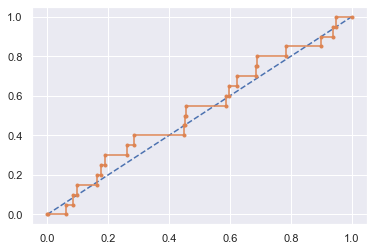

In [40]:
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Q5 B - Use cross validation techniques.

In [41]:
#Strafied cross validation to check how well Logistic regression with normal sampling would perform on an unseen data
results = []
names = []
seed=7
kfold = KFold(n_splits=50, random_state=seed,shuffle=True)
cv_results = cross_val_score(logreg, X_train, Y_train, cv=kfold)
print(cv_results)
names.append('LR')
msg = "Accuracy" '%s: %f%% (%f%%)' % ('LR', cv_results.mean()*100, cv_results.std()*100)
print(msg)


[1.         0.96153846 0.88461538 1.         0.92       0.8
 0.88       0.96       1.         0.88       0.96       0.96
 1.         0.96       0.88       0.96       0.96       0.88
 0.88       0.84       0.92       0.96       0.96       0.96
 0.96       0.96       0.96       0.88       0.8        0.84
 0.96       0.88       0.92       0.92       0.88       0.92
 1.         0.92       0.96       0.96       0.96       0.92
 1.         0.96       0.96       0.96       0.84       0.92
 1.         0.92      ]
AccuracyLR: 93.052308% (5.166058%)


In [42]:
# scikit-learn LOOCV cross-validation
from numpy import array
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import absolute
# data sample
# prepare cross validation
loocv = LeaveOneOut()
scores = cross_val_score(logreg, X_train, Y_train,
                         cv=loocv)
msg = "Accuracy" '%s: %f%% (%f%%)' % ('LR', scores.mean()*100, scores.std()*100)
print(msg)


mean(absolute(scores))


AccuracyLR: 92.817239% (25.820226%)


0.928172386272945

#### we can see that mean square error value is 0.1 which is so less which seems our model performance is good enough

#### Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.

In [43]:
# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}
# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)
model_1.fit(X_train, Y_train)
model_2.fit(X_train, Y_train)
model_3.fit(X_train, Y_train)
model_4.fit(X_train, Y_train)
model_5.fit(X_train, Y_train)
# Prediction sets
preds_1 = model_1.predict(X_test)
preds_2 = model_3.predict(X_test)
preds_3 = model_3.predict(X_test)
preds_4 = model_4.predict(X_test)
preds_5 = model_5.predict(X_test)
print(round(accuracy_score(Y_test, preds_1), 3))
print(round(accuracy_score(Y_test, preds_2), 3))
print(round(accuracy_score(Y_test, preds_3), 3))
print(round(accuracy_score(Y_test, preds_4), 3))
print(round(accuracy_score(Y_test, preds_5), 3))

0.889
0.892
0.892
0.873
0.885


In [44]:
### GridSearch 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
### Number of nearest neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
gs = GridSearchCV(knn_clf,param_grid,cv=10)
gs.fit(X_train, Y_train)
gs.best_params_
gs.cv_results_['params']
gs.cv_results_['mean_test_score']



array([0.87951111, 0.93137778, 0.93137778, 0.93058413, 0.93138413,
       0.93297143, 0.93297143, 0.93297143, 0.87951111, 0.93137778,
       0.93137778, 0.93058413, 0.93138413, 0.93297143, 0.93297143,
       0.93297143, 0.87951111, 0.93137778, 0.93137778, 0.93058413,
       0.93138413, 0.93297143, 0.93297143, 0.93297143, 0.87951111,
       0.93137778, 0.93137778, 0.93058413, 0.93138413, 0.93297143,
       0.93297143, 0.93297143])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
lrcl =  LogisticRegression()
nbcl =  GaussianNB()
dtcl = DecisionTreeClassifier()
lr = LinearRegression()
knncl =  KNeighborsClassifier()
svcl= SVC()
svr = SVR()
rfcl =  RandomForestClassifier()
bgcl =  BaggingClassifier()
nncl = MLPClassifier()

In [46]:
for clf, label in zip([lrcl , nbcl, dtcl, lr, knncl, svcl, svr,  rfcl, bgcl, nncl], 
    ['lrcl' , 'nbcl', 'dtcl', 'lr', 'knncl', 'svcl', 'svr',  'rfcl',  'bgcl', 'nncl']):
    print("model name: " , label)
    print("\n model_hyperparameters \n" , clf.get_params() )

model name:  lrcl

 model_hyperparameters 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
model name:  nbcl

 model_hyperparameters 
 {'priors': None, 'var_smoothing': 1e-09}
model name:  dtcl

 model_hyperparameters 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
model name:  lr

 model_hyperparameters 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
model name:  knncl

 model_hyperparameters 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': Non

In [47]:
### RandomizeSearch

# specify parameters and distributions to sample from
from scipy.stats import uniform
lg = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
params = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
randomCV = RandomizedSearchCV(lrcl, param_distributions=params,random_state=10) #default cv = 3
result=randomCV.fit(X_train,Y_train)

 
print(result.best_params_)


{'C': 2.7352737174449366, 'penalty': 'l2'}


In [48]:
lg=LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')
lg.fit(X_train,Y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')

In [49]:
modellg= lg.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modellg)

Accuracy Score of Training Data:  0.9345570630486831


In [50]:
y_predictlg= lg.predict(X_test)
modellg = accuracy_score(Y_test, y_predictlg)
print('Accuracy Score of Test Data:', modellg)

Accuracy Score of Test Data: 0.9331210191082803


In [51]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           0       0.94      1.00      0.97       294

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.93      0.90       314



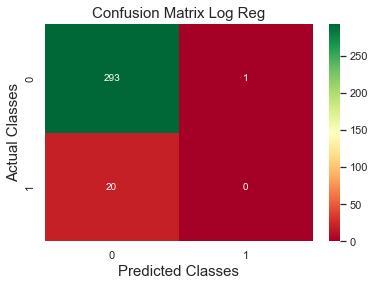

In [52]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictlg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);


#### D. Use any other technique/method which can enhance the model performance

In [53]:
# Implementing random under sampling
under= RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under= under.fit_resample(X_train, Y_train)

In [54]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))

Under Training Fail    : 84 (33.33%)
under Training Pass  : 168 (66.67%)


In [55]:
logreg = LogisticRegression()

logreg.fit(X_under, y_under)
lr_score = logreg.score(X_test, Y_test)
print(f"Score : {lr_score}")

Score : 0.7070063694267515


In [56]:
# Implementing SMOTE
smt = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)

In [57]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))

SMOTE Training Fail    : 584 (33.31%)
SMOTE Training Pass  : 1169 (66.69%)


In [58]:
logreg = LogisticRegression()

logreg.fit(X_SMOTE, y_SMOTE)
lr_score = logreg.score(X_test, Y_test)
print(f"Score : {lr_score}")

Score : 0.8184713375796179


In [59]:
### Random Oversampling
# Implementing random over sampling
over= RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= over.fit_resample(X_train, Y_train)
print("over Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("over Training Pass  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))

over Training Fail    : 584 (33.31%)
over Training Pass  : 1169 (66.69%)


In [60]:
logreg.fit(X_over, y_over)
lr_score = logreg.score(X_test, Y_test)
print(f"Score : {lr_score}")

Score : 0.7866242038216561


#### we can see that model accuracy is good in case of oversampling and SMOTE but not good in case of undersampling data for logistic regression

#### Using PCA 

[5.70050457e-01 2.45747077e-01 1.10877294e-01 2.71090196e-02
 1.61207353e-02 3.26281039e-03 2.76826589e-03 2.49837160e-03
 2.33610122e-03 2.06722863e-03 1.52549778e-03 1.45869373e-03
 1.40809564e-03 1.26434479e-03 1.16265923e-03 1.11625540e-03
 1.08879270e-03 1.01069168e-03 8.83014269e-04 8.25464216e-04
 7.53650148e-04 6.76377936e-04 6.52137880e-04 6.00693671e-04
 5.81661385e-04 5.47288708e-04 4.68927881e-04 1.53920527e-04
 1.45427475e-04 1.19410295e-04 9.94077693e-05 9.30574575e-05
 6.67112778e-05 5.31346975e-05 5.10007806e-05 4.76849296e-05
 4.59330738e-05 3.57930661e-05 3.01347220e-05 2.46782080e-05
 2.17879473e-05 1.83531589e-05 1.65258583e-05 1.52309273e-05
 1.25587754e-05 1.19123463e-05 1.05662802e-05 9.74167705e-06
 9.21536984e-06 8.02373379e-06 7.20715101e-06 5.97585110e-06
 4.72965291e-06 3.33063625e-06 2.83902024e-06 1.90565774e-06
 1.53679757e-06 1.48509949e-06 1.29136085e-06 1.00225101e-06
 6.68725867e-07 6.10953677e-07 5.55961059e-07 4.76799710e-07
 4.27790838e-07 3.396424

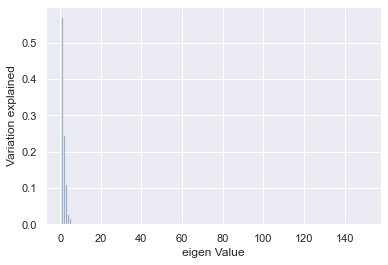

In [61]:
from sklearn.decomposition import PCA
#extracting componenets that explaint 95% of the variation
pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)

plt.bar(list(range(1,151)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

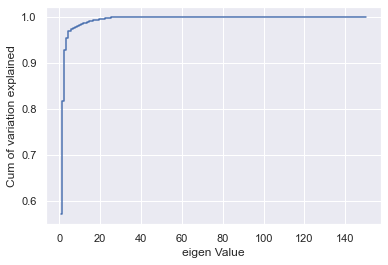

In [62]:
plt.step(list(range(1,151)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [63]:
pca5 = PCA(n_components=120)
Xpca5 = pca5.fit_transform(X_train)
X_test_pca5 = pca5.transform(X_test)

params = {
            'objective':'binary:logistic', #Using binary:logistic, as this is a classification problem with probability
            'max_depth': 4, # Max Depth of tree in each boost round = 4
            'alpha': 10, #L1 Regularization
            'learning_rate': 1.0, #Step Size Shrinkage
            'n_estimators':100 #no: of trees to build
        }
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(Xpca5, Y_train)

# make predictions on test data
y_pred_test = xgb_clf.predict(X_test_pca5)

# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model Testing accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

XGBoost model Testing accuracy score: 0.9268


#### E. Display and Explain Classification report¶

In [65]:
print("Classification Report for testing")
print(classification_report(Y_test, y_pred_test))

Classification Report for testing
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       294
           1       0.00      0.00      0.00        20

    accuracy                           0.93       314
   macro avg       0.47      0.49      0.48       314
weighted avg       0.88      0.93      0.90       314



#### Explanation

#### The precision for predicting -1 and predicting 1 is 96% and 96% respectively.
#### The recall for predicting -1 and predicting 1 is 97% and 95% respectively.
#### he f1-score for predicting -1 and predicting 1 is 96% and 96% respectively.
#### The overall average precision, recall and f1-score is 96%

In [66]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, Y_train)
predicted_labels_test = NNH.predict(X_test)
print("Accuracy Score for testing data",NNH.score(X_test, Y_test))

print("Classification Report for testing")
print(classification_report(Y_test, predicted_labels_test))

Accuracy Score for testing data 0.9363057324840764
Classification Report for testing
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       294
           1       0.00      0.00      0.00        20

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



In [67]:
#Using K-Fold CV
num_folds = 10

kfold = KFold(n_splits=num_folds)
results = cross_val_score(NNH, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87261146 0.85350318 0.91082803 0.95541401 0.98089172 0.94267516
 0.98089172 0.92948718 0.91025641 0.98076923]
Accuracy: 93.173% (4.294%)


In [68]:
#Using RandomizedSearchCV for hyperparameter tuning
k_range=[2,3,5,7,9,11,13,15]
options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=options)
knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=10)
rand.fit(X, y)
print(rand.best_score_)
print(rand.best_params_)

0.9342724154826065
{'weights': 'distance', 'n_neighbors': 11}


In [69]:
#Using Data after PCA for KNN
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(Xpca5, Y_train)
predicted_labels_test = NNH.predict(X_test_pca5)
print("Accuracy Score for testing data",NNH.score(X_test_pca5, Y_test))

Accuracy Score for testing data 0.9363057324840764


In [70]:
print("Classification Report for testing")
print(classification_report(Y_test, predicted_labels_test))

Classification Report for testing
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       294
           1       0.00      0.00      0.00        20

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



In [71]:
#Using SVM Model
from sklearn import svm
svm_model = svm.SVC(gamma=0.025, C=3, probability=True)
svm_model.fit(X_train, Y_train)
y_predict = svm_model.predict(X_test)
svm_model_score = svm_model.score(X_test,Y_test)
print("SVM model score : ",svm_model_score,"\n")
print("Classification Report for testing")
print(classification_report(Y_test, y_predict))

SVM model score :  0.9363057324840764 

Classification Report for testing
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       294
           1       0.00      0.00      0.00        20

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



In [72]:
#Using K-Fold CV
num_folds = 10

kfold = KFold(n_splits=num_folds)
results = cross_val_score(svm_model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87261146 0.84713376 0.91082803 0.95541401 0.98726115 0.94267516
 0.98726115 0.93589744 0.91666667 0.98076923]
Accuracy: 93.365% (4.533%)


In [73]:
#Using RandomizedSearchCV
rand_list = {"C": [2,3,5,7],
             "gamma": [0.025,0.05,0.1]}
mdl = svm.SVC(probability = True, random_state = 1)          
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 10, n_jobs = 4, cv = 3, random_state = 2017) 
rand_search.fit(X, y)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=1),
                   n_jobs=4,
                   param_distributions={'C': [2, 3, 5, 7],
                                        'gamma': [0.025, 0.05, 0.1]},
                   random_state=2017)

In [74]:
print(rand_search.best_score_)
print(rand_search.best_params_)

0.9336314952784921
{'gamma': 0.05, 'C': 2}


In [75]:
#Using PCA Data for SVM
svm_model = svm.SVC(gamma=0.025, C=3, probability=True)
svm_model.fit(Xpca5, Y_train)
y_predict = svm_model.predict(X_test_pca5)
svm_model_score = svm_model.score(X_test_pca5,Y_test)
print("SVM model score : ",svm_model_score,"\n")
print("Classification Report for testing")
print(classification_report(Y_test, y_predict))

SVM model score :  0.9363057324840764 

Classification Report for testing
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       294
           1       0.00      0.00      0.00        20

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



#### 6. Post training and conclusion

#### A. Display and compare all models with training and test accuracy

In [76]:
y_pred_train = xgb_clf.predict(Xpca5)
print("XGBoost Model Training Accuracy : ",accuracy_score(Y_train, y_pred_train))
print("XGBoost Model Testing Accuracy : ",accuracy_score(Y_test, y_pred_test))
predicted_labels_train = NNH.predict(Xpca5)
print("KNN Model Training Accuracy : ",accuracy_score(Y_train, predicted_labels_train))
print("KNN Model Testing Accuracy : ",accuracy_score(Y_test, predicted_labels_test))
y_predict_train = svm_model.predict(Xpca5)
print("SVM Model Training Accuracy : ",accuracy_score(Y_train, y_predict_train))
print("SVM Model Testing Accuracy : ",accuracy_score(Y_test, y_predict))


XGBoost Model Training Accuracy :  0.9529130087789306
XGBoost Model Testing Accuracy :  0.9267515923566879
KNN Model Training Accuracy :  1.0
KNN Model Testing Accuracy :  0.9363057324840764
SVM Model Training Accuracy :  1.0
SVM Model Testing Accuracy :  0.9363057324840764


#### B. Select the final best trained model

#### Based on the accuracy score and classification report, the SVM Model looks to be the best model.

##### C. Pickle the selected model

In [77]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))
print("\n Pickle file for the model can be found at : ",filename)


 Pickle file for the model can be found at :  finalized_model.sav


#### D. Conclusion on the results

#### The dataset has a lot of features
#### The number of features were reduced using multiple ways - dropping columns with low variance, dropping multi-collinear columns, PCA and so on...
#### As there were lot of features, visualization was helpful only to some extent to understand the data
#### The target variable data was imbalanced and SMOTE technique was used to balance the same
#### As there were lot of features, some of the CV techniques could not be applied (Eg: LOOCV)
#### As there were lot of features, hyperparameter tuning was time consuming
#### After modelling through multiple models like SVM, KNN and XGBoost, SVM Model looks to be the best model for this data set
#### The best model was considered carefully after examining the accuracy and classification report
#### The SVM Model is pickled for future use.